In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [3]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [4]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [8]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [9]:
X.shape

(20640, 9)

In [10]:
y.shape

(20640,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

In [14]:
# MSE for linear regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error (MSE) for Linear Regression: {mse_linear}")

Mean Squared Error (MSE) for Linear Regression: 4875794585.244864


In [16]:
# RMSE for linear regression
rmse_linear = np.sqrt(mse_linear)
print(f"Root Mean Squared Error (RMSE) for Linear Regression: {rmse_linear}")

Root Mean Squared Error (RMSE) for Linear Regression: 69826.89013012727


In [17]:
# MAE for linear regression
from sklearn.metrics import mean_absolute_error
mae_linear = mean_absolute_error(y_test , y_pred_linear)
print(f"Mean Squared Error (MAE) for Linear Regression: {mae_linear}")

Mean Squared Error (MAE) for Linear Regression: 51054.3258765154


In [18]:
# R-squared for linear regression
from sklearn.metrics import r2_score
r2 = r2_score(y_test , y_pred_linear)
print(f"R-squared: {r2}")

R-squared: 0.6260764404820007


Text(0, 0.5, 'Price')

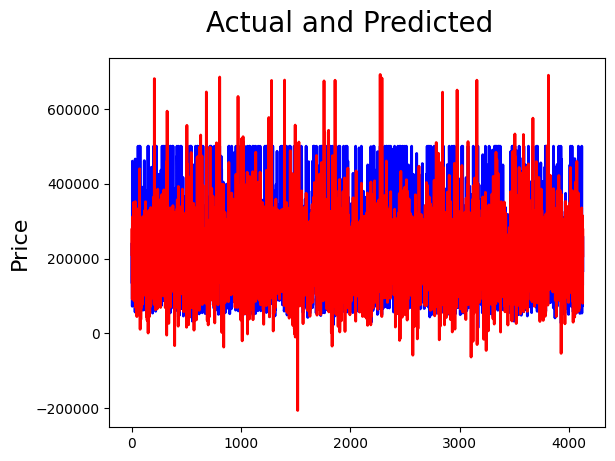

In [20]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,4129,1)]         # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred_linear, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading                            
plt.ylabel('Price', fontsize=16)  

Text(0, 0.5, 'ytest-ypred')

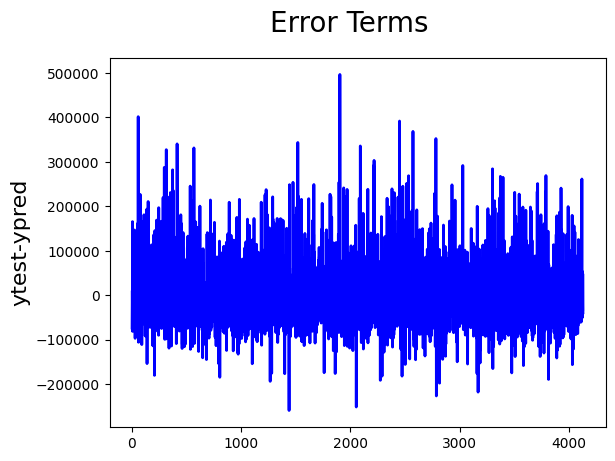

In [21]:
# Error terms
c = [i for i in range(1,4129,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred_linear, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)             
plt.ylabel('ytest-ypred', fontsize=16)        

In [22]:
#KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

In [23]:
# MSE for knn
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error (MSE) for KNN Regression: {mse_knn}")

Mean Squared Error (MSE) for KNN Regression: 3841803624.952636


In [24]:
# MAE for knn
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"Mean Absolute Error (MAE) for KNN Regression: {mae_knn}")

Mean Absolute Error (MAE) for KNN Regression: 41522.88798449612


In [25]:
# R-squared for knn
r2_Knn = r2_score(y_test , y_pred_knn)
print(f"R-squared: {r2_Knn}")

R-squared: 0.7053729681806727


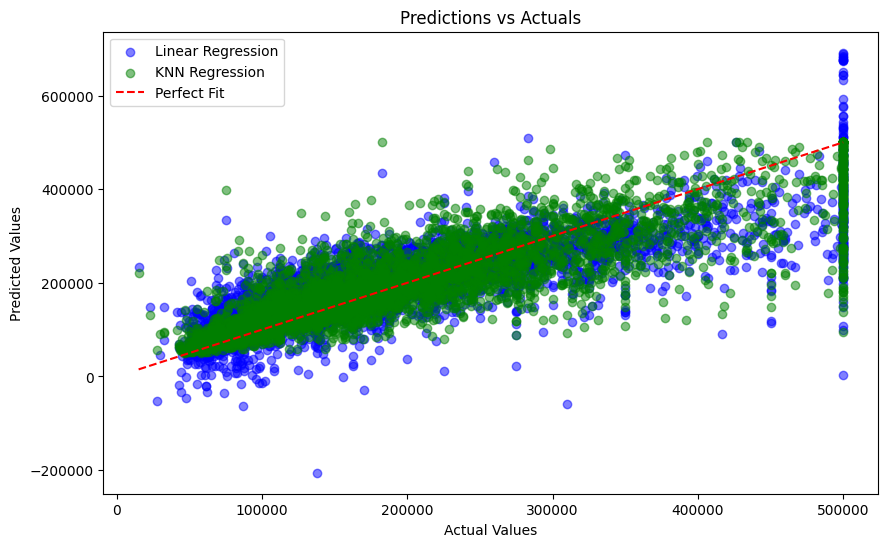

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_knn, alpha=0.5, color='green', label='KNN Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title("Predictions vs Actuals")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


In [32]:
metrics = {
    "Model": ["Linear Regression", "KNN Regression"],
    "MSE": [mse_linear, mse_knn],
    "MAE": [mae_linear, mae_knn],
    "R²": [r2, r2_Knn]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


               Model           MSE           MAE        R²
0  Linear Regression  4.875795e+09  51054.325877  0.626076
1     KNN Regression  3.841804e+09  41522.887984  0.705373
